In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

/Users/muhammadshahzebali/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [4]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000
mean,4.489667,0.0,0.003333,0.022833,0.095833,0.229667,0.380833,0.815000,2.040500,5.851500,...,34.411500,23.410833,16.781833,18.320167,23.820167,18.936833,9.157167,2.783833,0.903833,0.09300
std,2.840464,0.0,0.075210,0.457180,2.494464,4.855634,5.883755,8.964309,13.320114,24.088175,...,57.150747,48.769483,42.327168,44.743938,53.096607,46.870204,31.205610,17.486349,9.630180,2.54508
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.000000,8.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,0.0,3.000000,32.000000,146.000000,224.000000,213.000000,221.000000,221.000000,222.000000,...,255.000000,249.000000,255.000000,255.000000,254.000000,255.000000,248.000000,255.000000,192.000000,97.00000


In [5]:
df.shape

(6000, 785)

In [6]:
#report = ProfileReport(df, title = "mnist data")
#report.to_file("initial.html")

<Axes: >

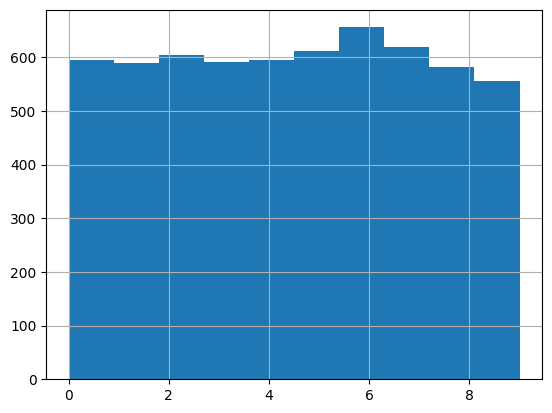

In [7]:
df['label'].hist()

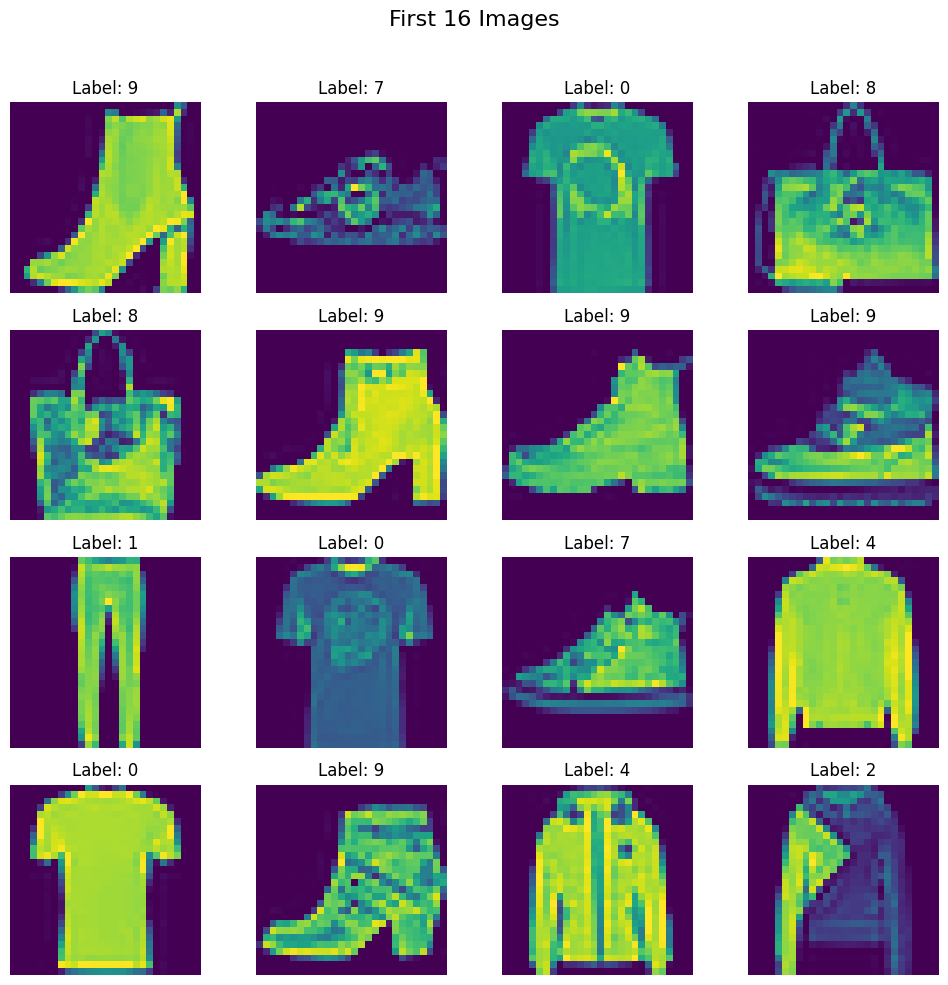

In [8]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [9]:
X = df.iloc[:, 1:].values
y= df.iloc[:,0].values


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0 # Since we have 255 pixels in a image so we divide by 255 to scale

# Create a custom data class

In [12]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]

# Create train dataset object

In [13]:
train_dataset = CustomDataset(X_train, y_train) # this will extract data from above class

In [14]:
len(train_dataset)

4800

In [15]:
test_dataset = CustomDataset(X_test, y_test)

In [16]:
len(test_dataset)

1200

# Create train and test loader

In [17]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define NN class

In [18]:
# define NN class

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Dropout(p= 0.5),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(p= 0.5),
        
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [19]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [20]:
X_train.shape

(4800, 784)

# Instatite the model

In [21]:
model = MyNN(X_train.shape[1])

## loss function

criterion = nn.CrossEntropyLoss()

# optimizer

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [22]:
len(train_loader) # we have 150 batches

150

# Training loop

In [23]:
# training loop

for epoch in range(epochs): #this loop will run for 100 times

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader: #this will loop for 150 times

    # forward pass
    outputs = model(batch_features) # to calculate y_pred

    # calculate loss
    loss = criterion(outputs, batch_labels) # y_pred and y_actual

    # back pass
    optimizer.zero_grad() # to clear your gradients
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}') # loss on each epoch

Epoch: 1 , Loss: 1.459214733839035
Epoch: 2 , Loss: 0.9097739108403524
Epoch: 3 , Loss: 0.7812021692593892
Epoch: 4 , Loss: 0.7018024071057638
Epoch: 5 , Loss: 0.65477840701739
Epoch: 6 , Loss: 0.6045099457105001
Epoch: 7 , Loss: 0.5788602761427561
Epoch: 8 , Loss: 0.5522429621219636
Epoch: 9 , Loss: 0.5387655323743821
Epoch: 10 , Loss: 0.5191506525874138
Epoch: 11 , Loss: 0.503731726706028
Epoch: 12 , Loss: 0.48370285749435427
Epoch: 13 , Loss: 0.4733843003710111
Epoch: 14 , Loss: 0.463603916366895
Epoch: 15 , Loss: 0.449946837524573
Epoch: 16 , Loss: 0.436974123219649
Epoch: 17 , Loss: 0.42355805983146033
Epoch: 18 , Loss: 0.4095368349552155
Epoch: 19 , Loss: 0.40888302693764367
Epoch: 20 , Loss: 0.40783421948552134
Epoch: 21 , Loss: 0.3727288146317005
Epoch: 22 , Loss: 0.37999037767450017
Epoch: 23 , Loss: 0.36569554249445596
Epoch: 24 , Loss: 0.35117790604631105
Epoch: 25 , Loss: 0.3542820476492246
Epoch: 26 , Loss: 0.34636010413368545
Epoch: 27 , Loss: 0.335212162733078
Epoch: 28 

# Set model to eval mode

In [24]:
model.eval() # this put our model in eval model

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
# evaluation code for testing data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8408333333333333


In [26]:
# evaluation code for training data
# overfitting 
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:


    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.966875


# improvements to NN